In [1]:
import numpy as np
import cv2 # OpenCV
import matplotlib
import matplotlib.pyplot as plt
import collections
import os

# iscrtavanje slika u notebook-u
%matplotlib inline
# prikaz vecih slika
matplotlib.rcParams['figure.figsize'] = 16,12


In [2]:
def rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.21*img_rgb[:, :, 0] + 0.72*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray


def treshold(image):
    treshold_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)
    return treshold_image

def opening(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    eroded_image = cv2.erode(image, kernel, iterations=1)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
    return dilated_image

def closing(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    dilated_image = cv2.dilate(image, kernel, iterations=3)
    eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
    return eroded_image


def preparing_images(images):
    preparing_images = []
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #prvo prebacivanje u RGB iz BGR
        image = rgb2gray(image) #radjenje grayscale
        image = opening(image)
        #image = closing(image)
        #image = opening(image)
        #image = treshold(image)
        #image = closing(image)
        preparing_images.append(image)
        
    return preparing_images

In [3]:
#detekcija knjiga
def detection_regions(image):
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def choosing_contours(contours):
    contours_book = [] #ovde ce biti samo konture koje pripadaju knjigama
    for contour in contours: # za svaku konturu
        center, size, angle = cv2.minAreaRect(contour) # pronadji pravougaonik minimalne povrsine koji ce obuhvatiti celu konturu
        width, height = size
        #if (width > 20 and width < 100 and height > 200 and height < 1000) or (height > 20 and height < 100 and width > 200 and width < 1000):
        if (width > 20 and height > 100) or (height > 20 and width < 100):
            contours_book.append(contour) # ova kontura pripada bar-kodu
    return contours_book

8
1


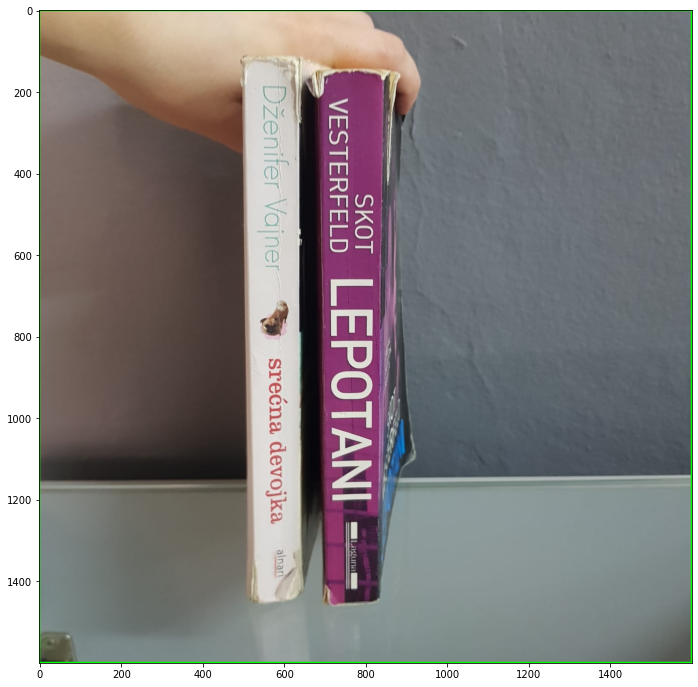

In [4]:
#glavna funkcija (main)
#images = load_images_from_folder("skup_podataka")
img = cv2.imread('skup_podataka/saKnjigom/saKnjigom173.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
images = [img]
images = preparing_images(images)
plt.imshow(images[0], 'gray')


img2 = img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
konture = detection_regions(images[0])
print(len(konture))
konture = choosing_contours(konture)
print(len(konture))
cv2.drawContours(img2, konture, -1, (0, 255, 0), 4)
plt.imshow(img2)